# Palmer Penguinis Project Anality
***
This notebook contains my analysis of the famous palmer penguins dataset.

The dataset is avalible in [on GitHub]

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

## Imports
****

We use pandas for the DataFrame data strucuture.

It allows us to investigate CSV files, amongst other features.

### Load Data
***

Load the palmer penguins data set from a URL.

In [78]:
# Data frames.
import pandas as pd

# Numerical arrays and rando numbers.
import numpy as np

# Plot.
import matplotlib.pyplot as plt


import seaborn as sns


I will be using scikit-learn to do Principal Component Analysis with Penguins data. Let us load PCA module from scikit-learn. We will be using scikit-Learn's ability chain together multiple steps of analysis using “pipeline”. 

As I will compare two variables and for this, I need to import NumPy, Matplotlib, seaborn and others to analyze between them. 

I had decided to import all of them at the beginning of this project. This way I can work with my code without worry. 



In [79]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

The data is now loaded and we can inspect it.

In [80]:
#  Load the penguins data set.
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [81]:
# Let's have a look
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Overview about Dataset.
***
The Palmer Penguins dataset provided is related to penguins. It contains information about various penguin species observed in the Palmer Archipelago, Antarctica. Let’s explore this data further:

Species: The dataset includes three different species of penguins: Adelie, Chinstrap, and Gentoo.
Island: Penguins were collected from three different islands in the Palmer Archipelago: Torgersen, Biscoe, and Dream.
Bill Length (mm): The length of the penguin’s bill in millimeters.
Bill Depth (mm): The depth of the penguin’s bill in millimeters.
Flipper Length (mm): The length of the penguin’s flipper in millimeters.
Body Mass (g): The body mass of the penguin in grams.
Sex: The gender of the penguin (either male or female).
Year: The year when the data was collected.
Here are a few examples from the dataset:

Penguin 1 (Adelie, Torgersen):
Bill Length: 39.1 mm
Bill Depth: 18.7 mm
Flipper Length: 181 mm
Body Mass: 3750 g
Sex: Male
Year: 2007

Penguin 2 (Adelie, Torgersen):
Bill Length: 39.5 mm
Bill Depth: 17.4 mm
Flipper Length: 186 mm
Body Mass: 3800 g
Sex: Female
Year: 2007

Penguin 3 (Adelie, Torgersen):
Bill Length: 40.3 mm
Bill Depth: 18.0 mm
Flipper Length: 195 mm
Body Mass: 3250 g
Sex: Female
Year: 2007

The dataset contains a total of 344 penguins across the three species and islands.
https://allisonhorst.github.io/palmerpenguins/

## Inspect Data
***

#### Types of variables that will be used in this project

For explore this dataset I had decide to use two variables sex and body-mass.  

I had choses these 2 variables to check if it differences between male and female in the body-mass size. 

In [82]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [83]:
# Look at the first row.
df.iloc[0] 

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

## Setectin the 2 variables
***

I have decided to use Sex and Body mass. 

In this point I need to have the 2 variables I want to work it.  

This way I could just separate all datasets just the 2 columns is interest for me. 

In [84]:
# Sex of penguins.
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [85]:
# Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

#### Table 

| Gender  | Quantity     |
|---------|--------------|
| MALE    | 168          |
| FEMALE  | 165          |


<BarContainer object of 2 artists>

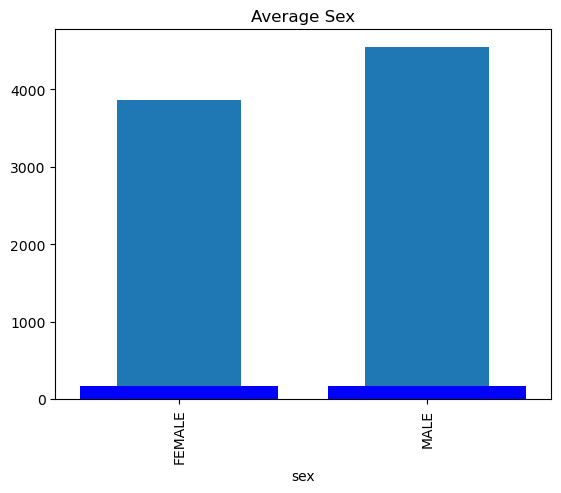

In [104]:
# Sample data (replace with your own)
grouped_data.plot(kind='bar', title='Average Sex')
x_axis = ['MALE', 'FEMALE']
y_axis = [168, 165]

# Create the bar chart
plt.bar(x_axis, y_axis, color='blue')

Analyzing the sex variable, I noticed that there is a minimal difference between male and female. 168 males and 165 females. Which is much better to assess the variable of body mass among them, since there is no population inequality in males and females. 

In [87]:
# Describe body mass
df['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

In [88]:
# Select the desired columns
selected_columns = df[["sex", "body_mass_g"]]

# Print the resulting DataFrame
print(selected_columns)

        sex  body_mass_g
0      MALE       3750.0
1    FEMALE       3800.0
2    FEMALE       3250.0
3       NaN          NaN
4    FEMALE       3450.0
..      ...          ...
339     NaN          NaN
340  FEMALE       4850.0
341    MALE       5750.0
342  FEMALE       5200.0
343    MALE       5400.0

[344 rows x 2 columns]


#### Histogram

###### Numpy and Matplotlib

Matplotlib is a multiplatform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. It was conceived by John Hunter in 2002, originally as a patch to Python for enabling interactive MATLAB-style plotting via gnu plot from the Python command line. Python's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months. John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003. It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities. 

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large userbase, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world. 

Seaborn (discussed in “Visualization with Seaborn”), plot, Hollo Views, Altair, and even Pandas itself can be used as wrappers around Matplotlib’s API. Even with wrappers like these, it is still often useful to dive into Matplotlib’s syntax to adjust the final plot output. For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly. 


References 
https://numpy.org/doc/stable/reference/generated/numpy.unique.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
https://docs.python.org/3/library/math.html
https://realpython.com/python-histograms/
https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html
https://medium.com/@ugursavci/complete-exploratory-data-analysis-using-python-9f685d67d1e4


In [89]:
# Get the counts.
values, counts = np.unique('sex', return_counts=True)

# Show.
values, counts

(array(['sex'], dtype='<U3'), array([1], dtype=int64))

In [90]:
# Assuming your DataFrame is named 'df'
selected_columns = df[['sex', 'body_mass_g']]

In [91]:
grouped_data = selected_columns.groupby('sex')['body_mass_g'].mean()

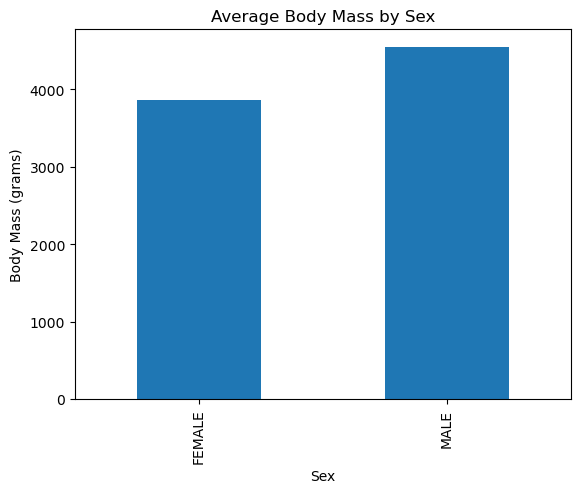

In [92]:
grouped_data.plot(kind='bar', title='Average Body Mass by Sex')
plt.xlabel('Sex')
plt.ylabel('Body Mass (grams)')
plt.show()

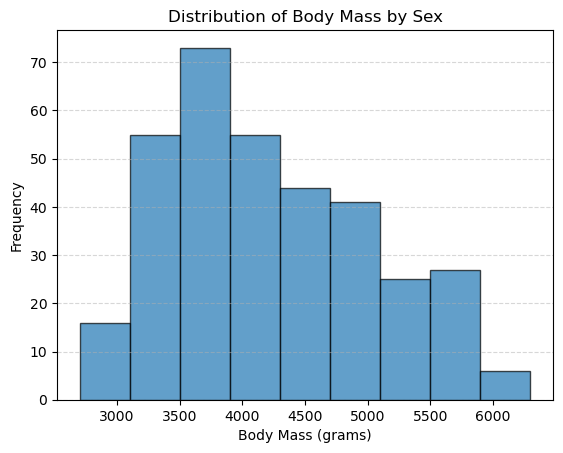

In [93]:
# Histogram Sex X Body_mass
# Replace 'body_mass_g' with the actual column name in your DataFrame

plt.hist(df['body_mass_g'], bins=9, edgecolor='black', alpha=0.7)
plt.xlabel('Body Mass (grams)')
plt.ylabel('Frequency')
plt.title('Distribution of Body Mass by Sex')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### Iris Dataset of Sex and Body Mass

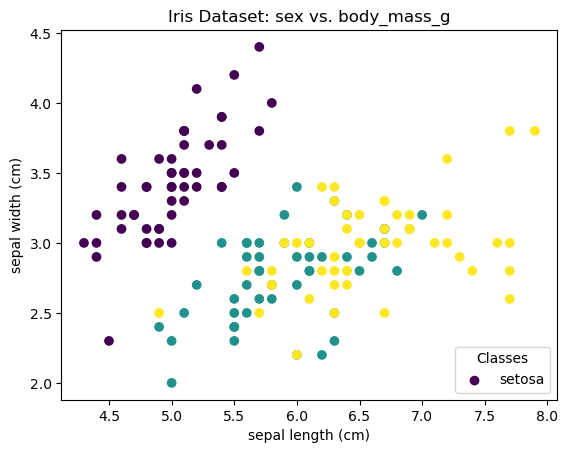

In [94]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Create a scatter plot
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset: sex vs. body_mass_g")
plt.legend(iris.target_names, loc="lower right", title="Classes")
plt.show()

https://archive.icv.uci.edu/dataset/53/iris

https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

## Math
***

$f(x) = x^2$

$\sum_{i=0}^{n-1} i$

$\bar{x} = \frac{\sum_{i=o}^ {n-1} x_i} {n}$

#### Calculator the BMI of dataset 

#### Male x Female


In [95]:
# Calculate BMI between male x female
def calculate_bmi(weight, height, sex):
    """
    Calculates BMI based on weight (in kg) and height (in meters).
    :param weight: Weight in kilograms.
    :param height: Height in meters.
    :param sex: 'male' or 'female'.
    :return: BMI value.
    """
    if sex == 'male':
        bmi = weight / (height ** 2)
    elif sex == 'female':
        bmi = (weight * 703) / (height ** 2)
    else:
        return "Invalid sex specified."

    if bmi <= 18.5:
        return "Underweight"
    elif 18.5 < bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Data provided by the user
data = [
    (4000, 1.75, 'male'),
    (3325, 1.65, 'female'),
    # ... (other data entries)
]

# Calculate BMI for each individual
for weight, height, sex in data:
    bmi_result = calculate_bmi(weight, height, sex)
    print(f"Weight: {weight} kg, Height: {height} m, Sex: {sex.capitalize()}, BMI: {bmi_result}")


Weight: 4000 kg, Height: 1.75 m, Sex: Male, BMI: Obese
Weight: 3325 kg, Height: 1.65 m, Sex: Female, BMI: Obese


In [96]:
# Create a dictionary with the given data
data = {
    'body_mass': [
        4000, 3325, 3500, 3500, 4475, 3425, 3900, 3175, 3975, 3400,
        # ... (remaining data)
    ],
    'sex': [
        'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female',
        # ... (remaining data)
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

   body_mass     sex
0       4000    male
1       3325  female
2       3500    male
3       3500  female
4       4475    male


In [97]:
# Summary statistics for body_mass
print(df['body_mass'].describe())


count      10.000000
mean     3667.500000
std       402.431844
min      3175.000000
25%      3406.250000
50%      3500.000000
75%      3956.250000
max      4475.000000
Name: body_mass, dtype: float64


In [98]:
# Group by sex and calculate average body mass
avg_body_mass_by_sex = df.groupby('sex')['body_mass'].mean()
print(avg_body_mass_by_sex)


sex
female    3365.0
male      3970.0
Name: body_mass, dtype: float64


In this project I tried to use different approaches and some codes gave errors (ex. SciPy. Stats) and others worked. I left the codes that I managed to get an answer. I believe there are still many other ways to analyze this data. however, between these 2 variables I chose sex and body mass in this dataset, it is a good start. 

***
### End